<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/Machine_Learning_em_Finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning em Finanças

1. Previsão de preços de ações utilizando séries temporais
> Algoritmo ARIMA

2. Classificação de boas empresas para investimento a longo prazo

3. Agrupamento de empresas similares baseado em suas características

4. Visualização, análise e mineração de sentimentos em textos financeiros

## Previsões de Preços com Séries Temporais

In [ ]:
# !pip install pmdarima

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [33]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataset = pd.read_csv('acoes.csv', parse_dates=['Date'], index_col='Date',
                      date_parser = dateparse, usecols = ['Date', 'BOVA11.SA'])
dataset

,BOVA11.SA
Date,
2015-01-02,47.259998
2015-01-05,46.320000
2015-01-06,46.580002
2015-01-07,48.150002
2015-01-08,48.509998
...,...
2023-04-10,98.660004
2023-04-11,102.910004
2023-04-12,103.349998


In [34]:
time_series = dataset['BOVA11.SA']

In [35]:
time_series

Date
2015-01-02     47.259998
2015-01-05     46.320000
2015-01-06     46.580002
2015-01-07     48.150002
2015-01-08     48.509998
                 ...    
2023-04-10     98.660004
2023-04-11    102.910004
2023-04-12    103.349998
2023-04-13    102.930000
2023-04-14    102.790001
Name: BOVA11.SA, Length: 2060, dtype: float64

## Exploração da série temporal

In [36]:
time_series[1]

46.31999969482422

In [37]:
time_series['2015-01-08']

48.5099983215332

In [39]:
time_series.index.max(), time_series.index.min()

(Timestamp('2023-04-14 00:00:00'), Timestamp('2015-01-02 00:00:00'))

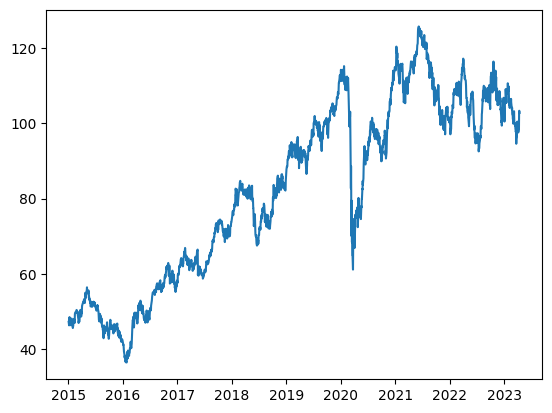

In [40]:
plt.plot(time_series);

In [41]:
figura = px.line(title='Histórico do preço das ações')
figura.add_scatter(x = time_series.index, y = time_series)

In [42]:
time_series_datas = time_series['2015-01-01':'2015-12-31']

In [43]:
time_series_datas

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-12-22    42.230000
2015-12-23    42.750000
2015-12-28    42.500000
2015-12-29    42.419998
2015-12-30    42.130001
Name: BOVA11.SA, Length: 246, dtype: float64

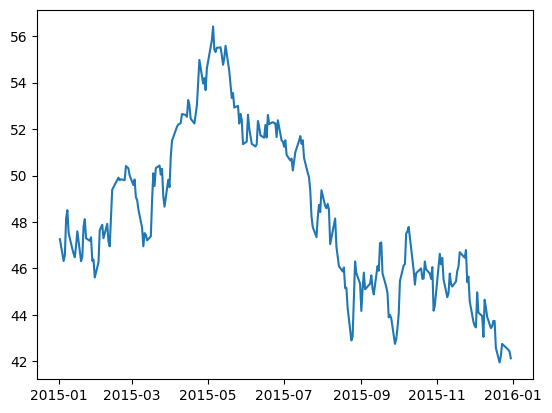

In [44]:
#gerando sub-DataFrames

plt.plot(time_series_datas);

In [10]:
figura = px.line(title="Histórico do preço das ações")
figura.add_scatter(x = times_series_datas.index, y = times_series_datas)

## Decomposição da série temporal

In [45]:
type(time_series)

pandas.core.series.Series

In [46]:
len(time_series) / 2

1030.0

In [47]:
decomposicao = seasonal_decompose(time_series, period=len(time_series) // 2)

In [48]:
tendencia = decomposicao.trend # tendencias
sazonal = decomposicao.seasonal # sazonalidade
aleatorio = decomposicao.resid # residuais

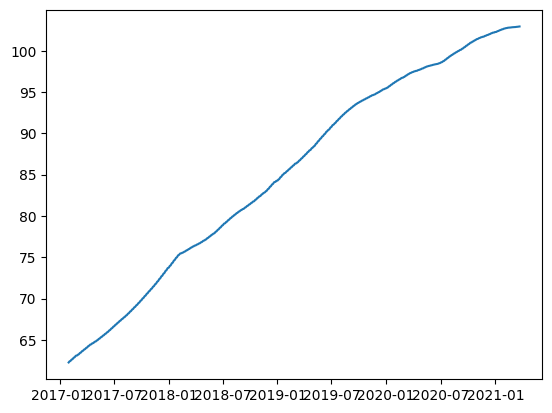

In [49]:
plt.plot(tendencia);

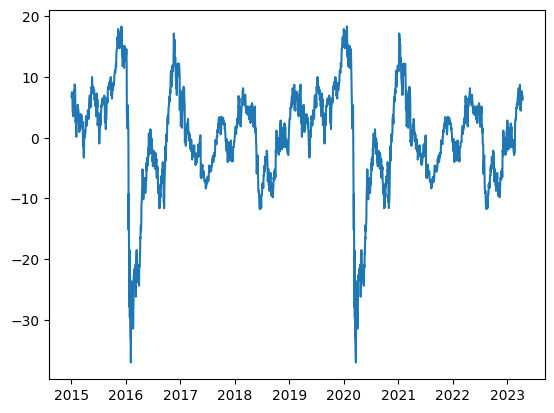

In [50]:
plt.plot(sazonal); # interessante para vendas de produtos, para saber quando vende mais ou menos

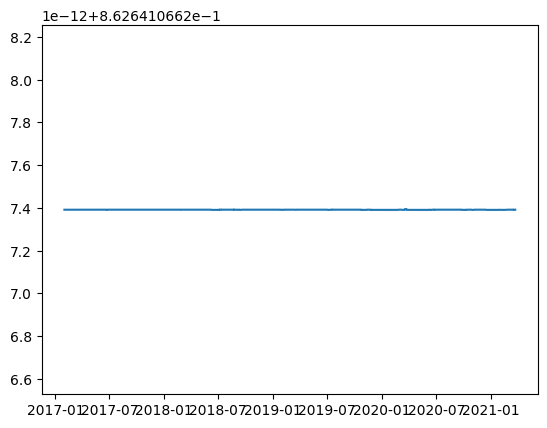

In [51]:
plt.plot(aleatorio);

## Previsões ARIMA

In [52]:
# o auto_arima vai escolher melhor os hiperparâmetros para que o algoritmo escolha os melhores
modelo = auto_arima(time_series, suppress_warnings=True, error_action='ignore')

In [53]:
# Parâmetros P, Q e D
modelo.order

(2, 1, 2)

In [54]:
previsoes = modelo.predict(n_periods=90)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [56]:
previsoes = np.array(previsoes)
previsoes

array([102.68823669, 102.81950754, 102.68796231, 102.80069173,
       102.71650222, 102.76993572, 102.74426141, 102.74813786,
       102.75902676, 102.74008764, 102.76153832, 102.74154826,
       102.75769996, 102.74638195, 102.75291558, 102.75044335,
       102.7499118 , 102.75232415, 102.74903442, 102.75242091,
       102.74946036, 102.75171584, 102.75024553, 102.75099183,
       102.75082513, 102.75059004, 102.75105303, 102.75050837,
       102.75102761, 102.75059992, 102.75090619, 102.75072327,
       102.75079939, 102.75080386, 102.75074751, 102.75082953,
       102.75074263, 102.75082017, 102.75075993, 102.7508002 ,
       102.75077876, 102.75078483, 102.75078965, 102.75077843,
       102.7507922 , 102.75077875, 102.75079005, 102.75078179,
       102.75078687, 102.75078459, 102.75078472, 102.75078601,
       102.75078398, 102.7507862 , 102.75078418, 102.75078578,
       102.75078468, 102.75078529, 102.75078509, 102.750785  ,
       102.75078527, 102.75078492, 102.75078527, 102.75

### Gráficos das Previsões

In [57]:
len(time_series)

2060

In [58]:
treinamento = time_series[:1081]
treinamento.shape

(1081,)

In [59]:
treinamento.index.min(), treinamento.index.max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2019-05-08 00:00:00'))

In [68]:
teste = time_series[1081:]
teste.shape

(979,)

In [69]:
teste.index.min(), teste.index.max()

(Timestamp('2019-05-09 00:00:00'), Timestamp('2023-04-14 00:00:00'))

In [71]:
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [72]:
modelo2.order

(1, 1, 1)

In [73]:
teste.index

DatetimeIndex(['2019-05-09', '2019-05-10', '2019-05-13', '2019-05-14',
               '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-20',
               '2019-05-21', '2019-05-22',
               ...
               '2023-03-31', '2023-04-03', '2023-04-04', '2023-04-05',
               '2023-04-06', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14'],
              dtype='datetime64[ns]', name='Date', length=979, freq=None)

In [75]:
previsoes = pd.DataFrame(modelo2.predict(n_periods=979).values, index=teste.index)
previsoes.columns = ['previsoes']
previsoes

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



,previsoes
Date,
2019-05-09,92.142497
2019-05-10,92.178321
2019-05-13,92.216249
2019-05-14,92.255505
2019-05-15,92.295601
...,...
2023-04-10,132.584318
2023-04-11,132.625856
2023-04-12,132.667393


In [76]:
teste

Date
2019-05-09     91.370003
2019-05-10     90.800003
2019-05-13     88.309998
2019-05-14     88.760002
2019-05-15     87.870003
                 ...    
2023-04-10     98.660004
2023-04-11    102.910004
2023-04-12    103.349998
2023-04-13    102.930000
2023-04-14    102.790001
Name: BOVA11.SA, Length: 979, dtype: float64

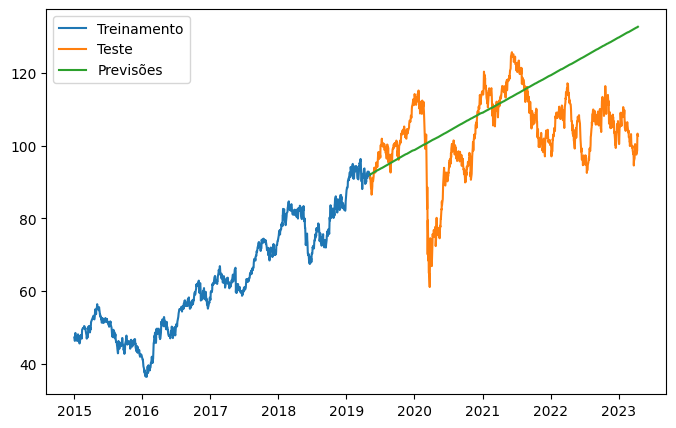

In [77]:
plt.figure(figsize=(8,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')
plt.legend();

### Avaliação do ARIMA

In [79]:
# PREVISAO - TESTE 

teste[0:2]

Date
2019-05-09    91.370003
2019-05-10    90.800003
Name: BOVA11.SA, dtype: float64

In [80]:
previsoes[0:2]

,previsoes
Date,
2019-05-09,92.142497
2019-05-10,92.178321


In [85]:
# Erro absoluto
abs(teste - previsoes['previsoes'])

Date
2019-05-09     0.772494
2019-05-10     1.378318
2019-05-13     3.906251
2019-05-14     3.495503
2019-05-15     4.425598
                ...    
2023-04-10    33.924315
2023-04-11    29.715852
2023-04-12    29.317395
2023-04-13    29.778930
2023-04-14    29.960467
Length: 979, dtype: float64

In [88]:
# Erro médio 
abs(teste - previsoes['previsoes']) / len(teste)

Date
2019-05-09    0.000789
2019-05-10    0.001408
2019-05-13    0.003990
2019-05-14    0.003570
2019-05-15    0.004521
                ...   
2023-04-10    0.034652
2023-04-11    0.030353
2023-04-12    0.029946
2023-04-13    0.030418
2023-04-14    0.030603
Length: 979, dtype: float64

In [89]:
# Erro total
sum(abs(teste - previsoes['previsoes']) / len(teste))

12.858079690849802

In [90]:
from sklearn.metrics import mean_absolute_error

In [91]:
mean_absolute_error(teste, previsoes)

12.858079690849793